In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
datosCrudos = gpd.read_file(filename='hidrolingw_c/')

In [3]:
datosCrudos.head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,CLAVE,DESCRIPCIO,geometry
0,33,22,0,0,206.960892,1,300,300,Corriente perenne,LINESTRING (396902.5168485302 2107891.24194511...
1,3,35,0,0,384.510155,2,300,300,Corriente perenne,LINESTRING (404347.6962235207 2108103.24220444...
2,37,27,0,0,85.901970,3,310,310,Corriente intermitente,LINESTRING (449314.6182314735 2107847.23455607...
3,2,38,0,0,538.632375,4,300,300,Corriente perenne,LINESTRING (418603.6752831056 2108111.24005076...
4,38,44,0,0,237.167148,5,300,300,Corriente perenne,LINESTRING (418167.5783097775 2107834.23807896...


In [4]:
datosCrudos.DESCRIPCIO.unique()

array(['Corriente perenne', 'Corriente intermitente', 'Acueductos',
       'Canales', 'L¡mite estatal'], dtype=object)

In [5]:
datosCrudos=datosCrudos.loc[ datosCrudos.DESCRIPCIO != 'L¡mite estatal', : ]

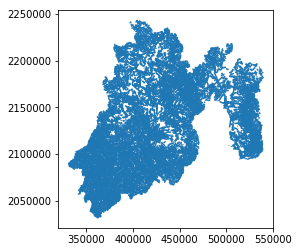

In [6]:
datosCrudos.plot()

In [7]:
datosCrudos.crs

{'init': 'epsg:32614'}

In [8]:
municipios = gpd.read_file('Municipios/')

In [9]:
municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 5 columns):
CVE_ENT     2456 non-null object
CVE_MUN     2456 non-null object
NOM_MUN     2456 non-null object
OID         2456 non-null int64
geometry    2456 non-null object
dtypes: int64(1), object(4)
memory usage: 96.0+ KB


In [10]:
municipios.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,..."
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831455 19.21009500703628...
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070159 19.27620941570171...
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621088 19.50284888316681...
4,09,014,Benito Ju�rez,5,POLYGON ((-99.14349968483091 19.35724145471904...


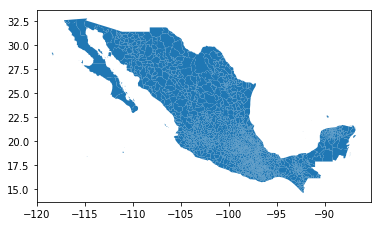

In [11]:
municipios.plot()

In [12]:
municipios.loc[municipios.NOM_MUN=='Toluca',:].head(100)

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
125,15,106,Toluca,126,POLYGON ((-99.55594164086919 19.28626000175705...


In [13]:
edomex=municipios.loc[municipios.CVE_ENT=='15',:]
edomex.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
97,15,082,Tejupilco,98,POLYGON ((-100.5386198917447 18.84411064181707...
98,15,104,Tlalnepantla de Baz,99,(POLYGON ((-99.08857090539354 19.5377291683252...
99,15,075,San Mart�n de las Pir�mides,100,(POLYGON ((-98.80338155096086 19.6595375392584...
100,15,065,Otumba,101,(POLYGON ((-98.75935469928473 19.7142223693961...
101,15,044,Jaltenco,102,(POLYGON ((-99.09852099846559 19.7640083700368...


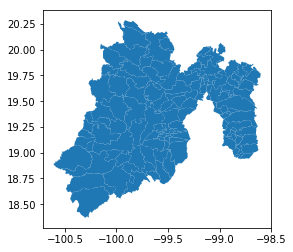

In [14]:
edomex.plot()

In [15]:
print(datosCrudos.crs)
print(edomex.crs)

{'init': 'epsg:32614'}
{'init': 'epsg:4326'}


In [16]:
datosCrudos=datosCrudos.to_crs({'init': 'epsg:3395'})
edomex=edomex.to_crs({'init': 'epsg:3395'})

In [17]:
print(datosCrudos.crs)
print(edomex.crs)

{'init': 'epsg:3395'}
{'init': 'epsg:3395'}


In [27]:
res_intersect = gpd.sjoin(edomex,datosCrudos, how='right', op='intersects')

In [29]:
res_intersect.head()

,index_left,CVE_ENT,CVE_MUN,NOM_MUN,OID,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,CLAVE,DESCRIPCIO,geometry
index_right,,,,,,,,,,,,,,,
909,97.0,15,082,Tejupilco,98.0,1087,1083,0,0,73.517782,910,300,300,Corriente perenne,LINESTRING (-11146102.95481106 2143215.2869763...
902,97.0,15,082,Tejupilco,98.0,1083,1052,0,0,161.369159,903,300,300,Corriente perenne,LINESTRING (-11146033.17253423 2143249.5785099...
902,143.0,15,086,Temascaltepec,144.0,1083,1052,0,0,161.369159,903,300,300,Corriente perenne,LINESTRING (-11146033.17253423 2143249.5785099...
876,97.0,15,082,Tejupilco,98.0,1052,1021,0,0,246.234400,877,300,300,Corriente perenne,LINESTRING (-11145963.32075092 2143391.7494755...
876,143.0,15,086,Temascaltepec,144.0,1052,1021,0,0,246.234400,877,300,300,Corriente perenne,LINESTRING (-11145963.32075092 2143391.7494755...


In [26]:
from shapely.geometry import Point, LineString, \
            MultiPoint, MultiLineString, Polygon, MultiPolygon